In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import ssl
ssl.create_default_https_context = ssl._create_unverified_context

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL', 'GOOG', 'META','TSLA']

In [3]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [4]:
appl_data = news_tables['AAPL']
appl_rows = appl_data.findAll('tr')

for index,row in enumerate(appl_rows):
    title = row.a.text
    timestamp = row.td.text

    print(timestamp+" "+title)


            Today 05:30AM
         Can This Popular Vanguard Tech ETF Trounce the S&P 500 Again in 2025?

            05:29AM
         Apple lifts US stock index futures as crucial inflation test looms

            05:00AM
         DeepSeek sinks stocks, Big Tech earnings, and AI for cancer: AI news roundup

            04:51AM
         Apple Shares Jumps 3.5% in Following Strong Quarterly Results

            04:51AM
         Over 25% of Warren Buffett's $300 Billion Portfolio Is Invested in These 4 Tech Stocks. Here's the Best of the Bunch.

            04:40AM
         Apple shares rise as rosy sales outlook suggests iPhone demand momentum

            04:21AM
         Apple Forecast Cheers Investors After Mixed Holiday Results

            04:12AM
         Futures higher, Trump's tariff threats, Apple earnings - what's moving markets

            03:16AM
         Is Apple Inc. (AAPL) Among Warren Buffetts Longest-Held Stocks?

            02:40AM
         Apple Inc (AAPL) Q1 2025 

In [5]:
from datetime import datetime

parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.strip().split(' ')  # Ensure proper splitting

        if len(date_data) == 1:  
            # If only time is present, assume today's date
            date = datetime.today().strftime('%Y-%m-%d')
            time = date_data[0]
        else:
            # Standard case: Date and Time present
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

# Create DataFrame
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

# Convert to datetime safely
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

/var/folders/xj/4mvtqrh126x0tyj_df2t96jc0000gn/T/ipykernel_2356/4152639945.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date


In [6]:
# Remove NaT values from the date column
df = df.dropna(subset=['date'])

In [7]:
df

,ticker,date,time,title
1,AAPL,2025-01-31,05:29AM,Apple lifts US stock index futures as crucial ...
2,AAPL,2025-01-31,05:00AM,"DeepSeek sinks stocks, Big Tech earnings, and ..."
3,AAPL,2025-01-31,04:51AM,Apple Shares Jumps 3.5% in Following Strong Qu...
4,AAPL,2025-01-31,04:51AM,Over 25% of Warren Buffett's $300 Billion Port...
5,AAPL,2025-01-31,04:40AM,Apple shares rise as rosy sales outlook sugges...
...,...,...,...,...
395,TSLA,2025-01-31,04:10PM,"Tesla commits to cheaper car in first half, bu..."
396,TSLA,2025-01-31,04:09PM,Tesla Releases Fourth Quarter and Full Year 20...
397,TSLA,2025-01-31,04:04PM,Tesla Stock Closes Down 2.3%
398,TSLA,2025-01-31,03:17PM,Tesla's Model Y Price Could Be a Hint About th...


In [8]:
parsed_data

[['AAPL',
  'Today',
  '05:30AM',
  'Can This Popular Vanguard Tech ETF Trounce the S&P 500 Again in 2025?'],
 ['AAPL',
  '2025-01-31',
  '05:29AM',
  'Apple lifts US stock index futures as crucial inflation test looms'],
 ['AAPL',
  '2025-01-31',
  '05:00AM',
  'DeepSeek sinks stocks, Big Tech earnings, and AI for cancer: AI news roundup'],
 ['AAPL',
  '2025-01-31',
  '04:51AM',
  'Apple Shares Jumps 3.5% in Following Strong Quarterly Results'],
 ['AAPL',
  '2025-01-31',
  '04:51AM',
  "Over 25% of Warren Buffett's $300 Billion Portfolio Is Invested in These 4 Tech Stocks. Here's the Best of the Bunch."],
 ['AAPL',
  '2025-01-31',
  '04:40AM',
  'Apple shares rise as rosy sales outlook suggests iPhone demand momentum'],
 ['AAPL',
  '2025-01-31',
  '04:21AM',
  'Apple Forecast Cheers Investors After Mixed Holiday Results'],
 ['AAPL',
  '2025-01-31',
  '04:12AM',
  "Futures higher, Trump's tariff threats, Apple earnings - what's moving markets"],
 ['AAPL',
  '2025-01-31',
  '03:16AM',
 

In [9]:
s = len(parsed_data)
s

400

In [10]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date

In [11]:
df

,ticker,date,time,title,compound
1,AAPL,2025-01-31,05:29AM,Apple lifts US stock index futures as crucial ...,-0.1531
2,AAPL,2025-01-31,05:00AM,"DeepSeek sinks stocks, Big Tech earnings, and ...",-0.6597
3,AAPL,2025-01-31,04:51AM,Apple Shares Jumps 3.5% in Following Strong Qu...,0.6705
4,AAPL,2025-01-31,04:51AM,Over 25% of Warren Buffett's $300 Billion Port...,0.6369
5,AAPL,2025-01-31,04:40AM,Apple shares rise as rosy sales outlook sugges...,0.1779
...,...,...,...,...,...
395,TSLA,2025-01-31,04:10PM,"Tesla commits to cheaper car in first half, bu...",-0.2144
396,TSLA,2025-01-31,04:09PM,Tesla Releases Fourth Quarter and Full Year 20...,0.0000
397,TSLA,2025-01-31,04:04PM,Tesla Stock Closes Down 2.3%,0.0000
398,TSLA,2025-01-31,03:17PM,Tesla's Model Y Price Could Be a Hint About th...,0.0000


<Figure size 1000x800 with 0 Axes>

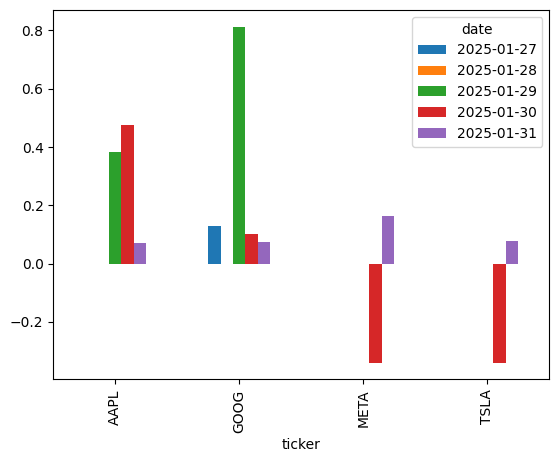

In [12]:
plt.figure(figsize=(10,8))

# Ensure 'compound' exists before grouping
if 'compound' in df.columns:
    mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()
    mean_df.plot(kind='bar')
    plt.show()
else:
    print("Error: 'compound' column not found in DataFrame.")

In [13]:
import yfinance as yf
masterdf = yf.download(tickers)['Close']
df_price = masterdf.pct_change().tail(4)
df_price

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,GOOG,META,TSLA
Date,,,,
2025-01-27,0.031780,-0.040267,0.019135,-0.023193
2025-01-28,0.036544,0.017031,0.021898,0.002367
2025-01-29,0.004617,0.000558,0.003203,-0.022583
2025-01-30,-0.007395,0.027640,0.015536,0.028733


In [14]:
mean_df

date,2025-01-27,2025-01-28,2025-01-29,2025-01-30,2025-01-31
ticker,,,,,
AAPL,NaN,NaN,0.3818,0.4767,0.072142
GOOG,0.128,0.0,0.8126,0.1027,0.072784
META,NaN,NaN,0.0000,-0.3400,0.162632
TSLA,NaN,NaN,0.0000,-0.3400,0.079030
